In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("C:\\Users\\md\\OneDrive\\Desktop\\ind.csv")

In [3]:
data.head()

,Region,Date,Unemployment_Rate,Employed,Labour_Participation_Rate,Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
data.count()


Region                        267
 Date                         267
 Unemployment_Rate            267
Employed                      267
Labour_Participation_Rate     267
Region.1                      267
longitude                     267
latitude                      267
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.columns.str.strip()

Index(['Region', 'Date', 'Unemployment_Rate', 'Employed',
       'Labour_Participation_Rate', 'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [7]:
data.isnull().sum()

Region                        0
 Date                         0
 Unemployment_Rate            0
Employed                      0
Labour_Participation_Rate     0
Region.1                      0
longitude                     0
latitude                      0
dtype: int64

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(267, 8)

In [10]:
data.describe()

,Unemployment_Rate,Employed,Labour_Participation_Rate,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Region                      267 non-null    object 
 1    Date                       267 non-null    object 
 2    Unemployment_Rate          267 non-null    float64
 3   Employed                    267 non-null    int64  
 4   Labour_Participation_Rate   267 non-null    float64
 5   Region.1                    267 non-null    object 
 6   longitude                   267 non-null    float64
 7   latitude                    267 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 16.8+ KB


In [12]:
data.columns = data.columns.str.strip().str.lower()
print(data.columns)
data['unemployment_rate'] = data['unemployment_rate'].round(2)


Index(['region', 'date', 'unemployment_rate', 'employed',
       'labour_participation_rate', 'region.1', 'longitude', 'latitude'],
      dtype='object')


In [13]:
data['unemployment_rate']

0       5.48
1       5.83
2       5.79
3      20.51
4      17.43
       ...  
262     7.29
263     6.83
264    14.87
265     9.35
266     9.98
Name: unemployment_rate, Length: 267, dtype: float64

In [14]:
mean_region = data.groupby('region')['unemployment_rate'].mean()
max_region=mean_region.idxmax()
print("The max unemployed region is:" ,max_region)
min_region=mean_region.idxmin()
print("The min unemployed region is:" ,min_region)
mean_r = data.groupby('region')['employed'].mean()
max_r=mean_r.idxmax()
print("The max employed region is:" ,max_r)
mean_r = data.groupby('region')['employed'].mean()
min_r=mean_r.idxmin()
print("The min employed region is:" ,min_r)
max_unemploy_rate=data['unemployment_rate'].max()
print("Max Unemployment rate is : " ,max_unemploy_rate)
min_unemploy_rate = data['unemployment_rate'].min()
print("Min Unemployment rate is:", min_unemploy_rate)


The max unemployed region is: Haryana
The min unemployed region is: Meghalaya
The max employed region is: Uttar Pradesh
The min employed region is: Sikkim
Max Unemployment rate is :  75.85
Min Unemployment rate is: 0.5


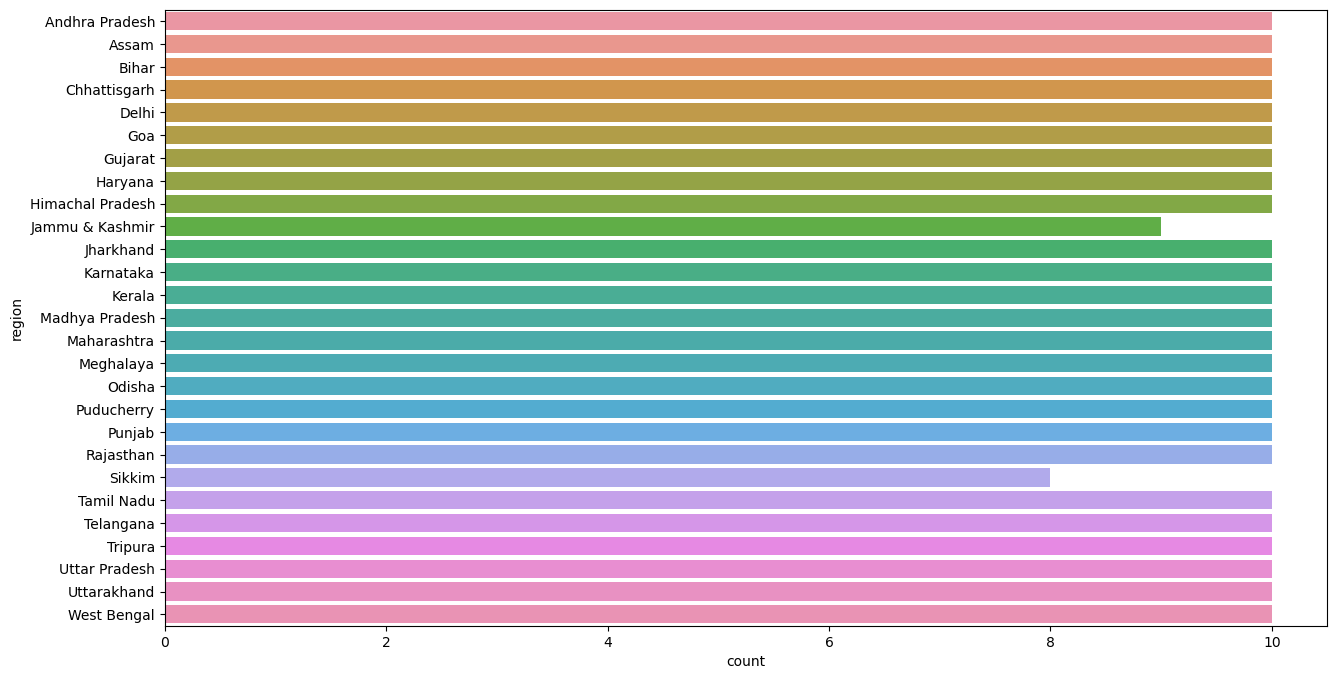

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(y='region',data=data)
plt.show()

In [16]:
data.head(2)

,region,date,unemployment_rate,employed,labour_participation_rate,region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,15.9129,79.74


In [17]:
data_sorted = data.sort_values(by='employed', ascending=False)

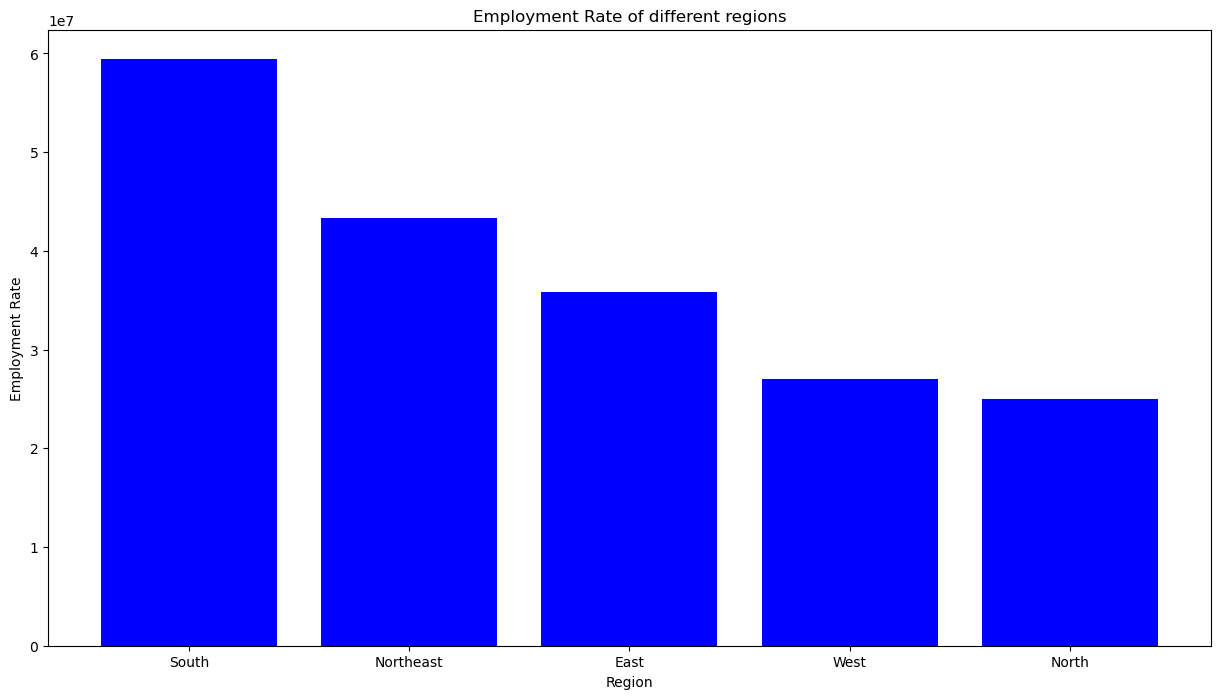

In [18]:
plt.figure(figsize=(15,8))
plt.bar(data['region.1'],data_sorted['employed'],color='blue')
plt.xlabel('Region')
plt.ylabel('Employment Rate')
plt.title("Employment Rate of different regions")
plt.show()

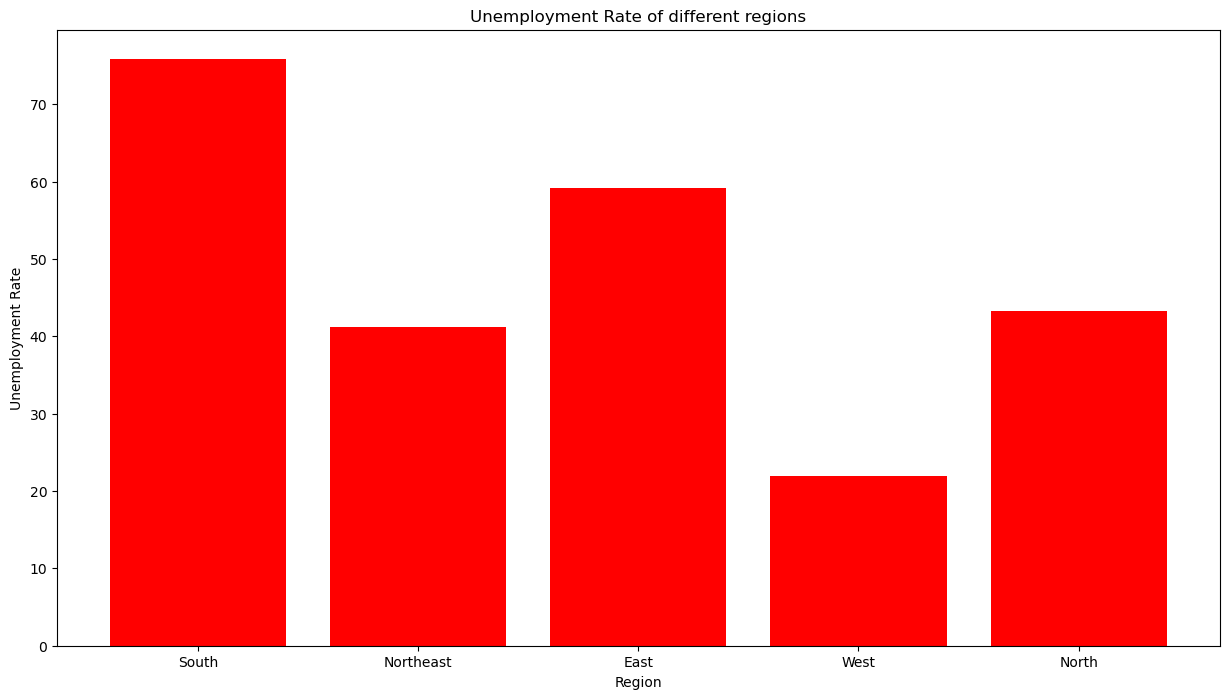

In [25]:
plt.figure(figsize=(15,8))
plt.bar(data['region.1'],data['unemployment_rate'],color='red')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.title("Unemployment Rate of different regions")
plt.show()

In [32]:
mean_region = data.groupby('region')['unemployment_rate'].mean()
mean_region

region
Andhra Pradesh       8.664000
Assam                4.856000
Bihar               19.471000
Chhattisgarh         7.819000
Delhi               18.414000
Goa                 12.167000
Gujarat              6.376000
Haryana             27.477000
Himachal Pradesh    16.065000
Jammu & Kashmir     16.477778
Jharkhand           19.539000
Karnataka            7.668000
Kerala               9.434000
Madhya Pradesh       6.854000
Maharashtra          7.979000
Meghalaya            3.866000
Odisha               6.462000
Puducherry          17.942000
Punjab              11.981000
Rajasthan           15.868000
Sikkim               9.792500
Tamil Nadu          12.187000
Telangana            6.833000
Tripura             25.055000
Uttar Pradesh        9.737000
Uttarakhand         11.156000
West Bengal         10.192000
Name: unemployment_rate, dtype: float64

In [33]:
regions = mean_region.index
avg_rates =mean_region.values

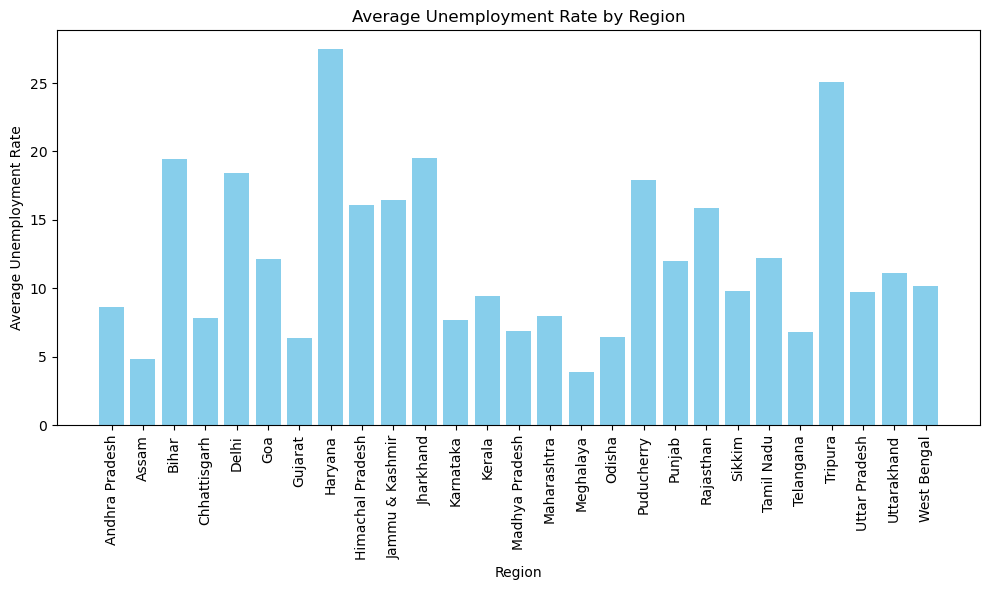

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(regions, avg_rates, color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()


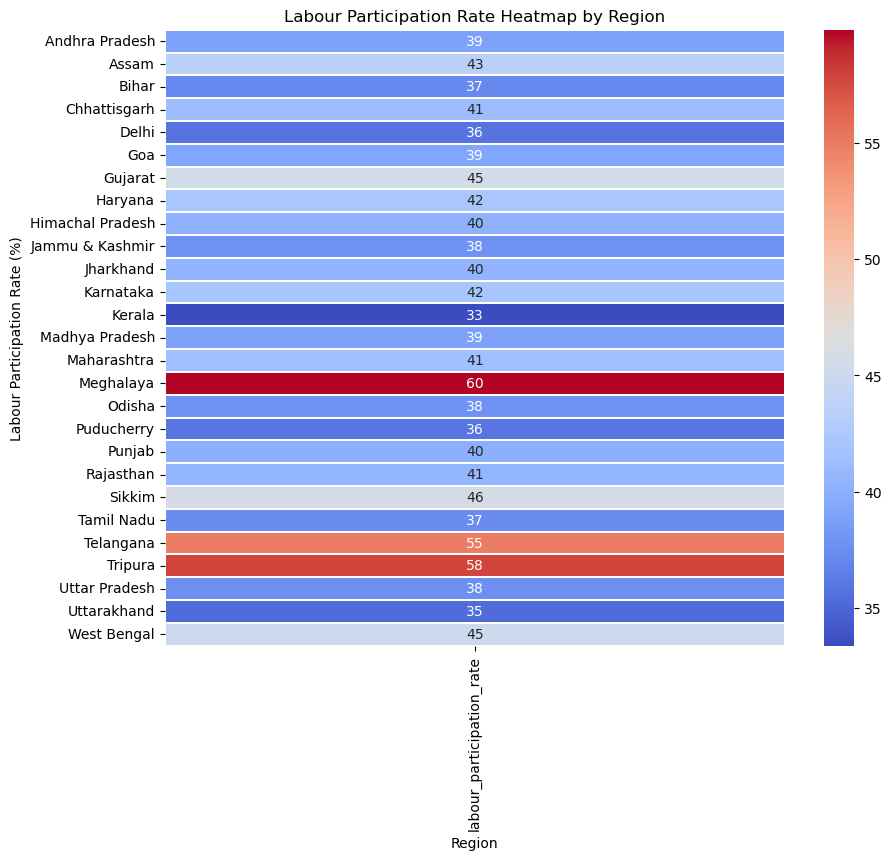

In [43]:
heatmap_data=data.pivot_table(index='region',values='labour_participation_rate',aggfunc='mean')
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data,cmap='coolwarm',annot=True,linewidths=0.2)
plt.title("Labour Participation Rate Heatmap by Region")
plt.xlabel("Region")
plt.ylabel("Labour Participation Rate (%)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()
            

In [54]:
data.head()

,region,date,unemployment_rate,employed,labour_participation_rate,region.1,longitude,latitude
218,Telangana,29-02-2020,8.29,16825970,58.24,South,18.1124,79.0193
100,Jharkhand,29-02-2020,11.85,10425425,44.40,East,23.6102,85.2799
208,Tamil Nadu,29-02-2020,2.09,27570589,43.20,South,11.1271,78.6569
110,Karnataka,29-02-2020,3.61,21677719,40.54,South,15.3173,75.7139
120,Kerala,29-02-2020,7.60,9828023,37.71,South,10.8505,76.2711


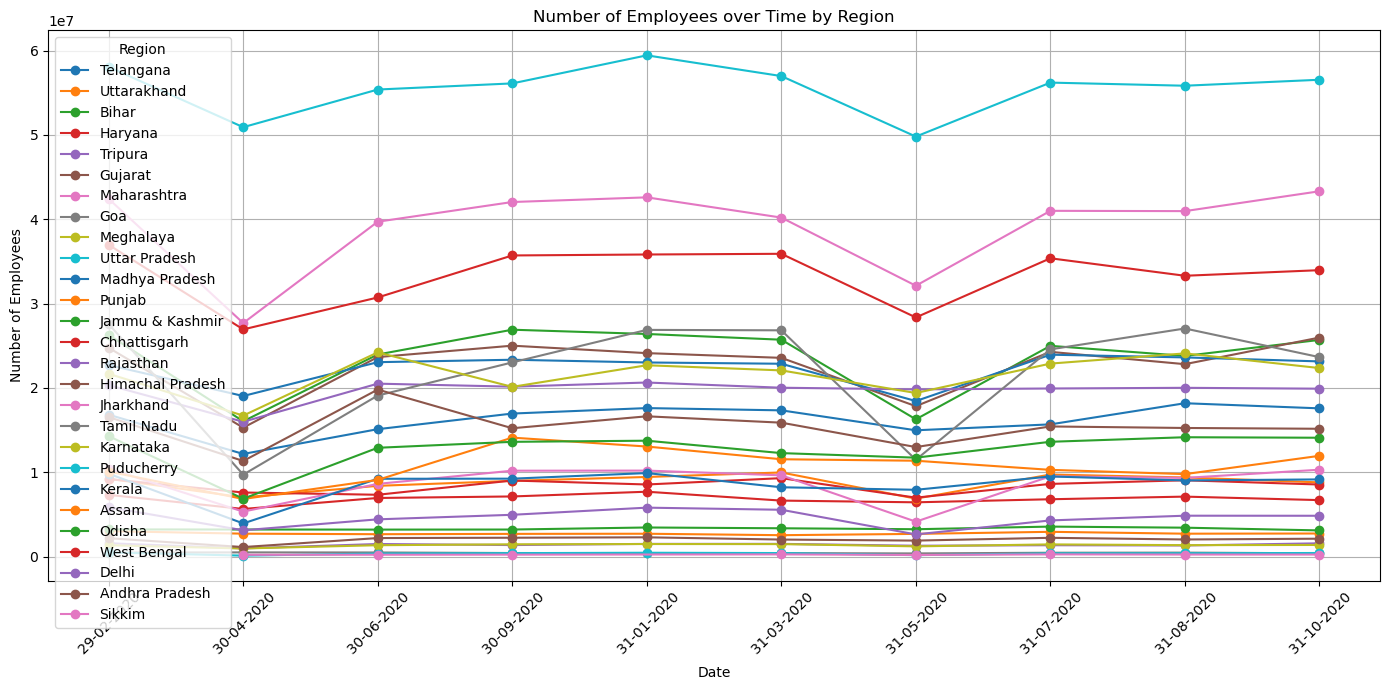

In [55]:
data = data.sort_values(by='date')
plt.figure(figsize=(14, 7))
for region in data['region'].unique():
    region_data = data[data['region'] == region]
    plt.plot(region_data['date'], region_data['employed'], marker='o', label=region)
plt.xlabel('Date')
plt.ylabel('Number of Employees')
plt.title('Number of Employees over Time by Region')
plt.legend(title='Region')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


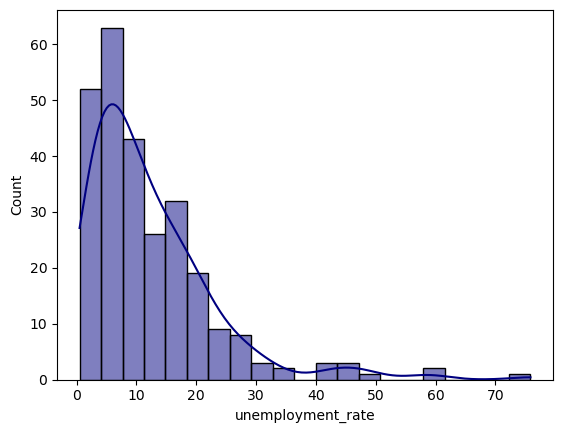

In [51]:
sns.histplot(data=data, x="unemployment_rate", kde=True,color="navy")
plt.show()

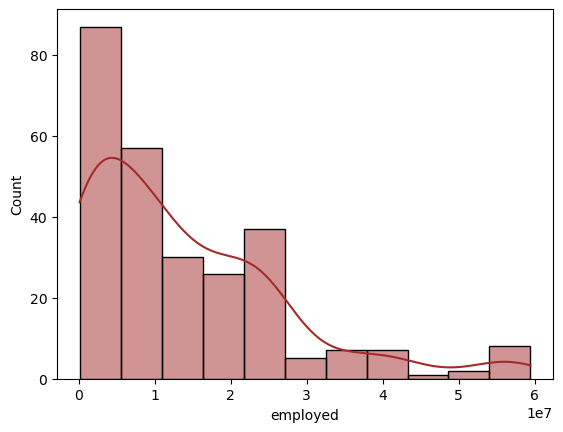

In [56]:
sns.histplot(data=data, x="employed", kde=True,color="brown")
plt.show()

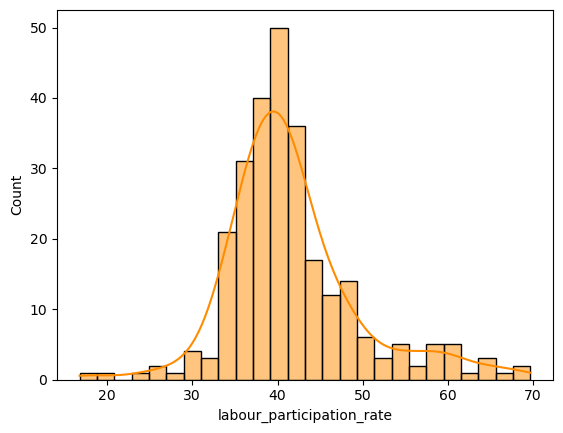

In [58]:
sns.histplot(data=data, x="labour_participation_rate", kde=True,color="darkorange")
plt.show()

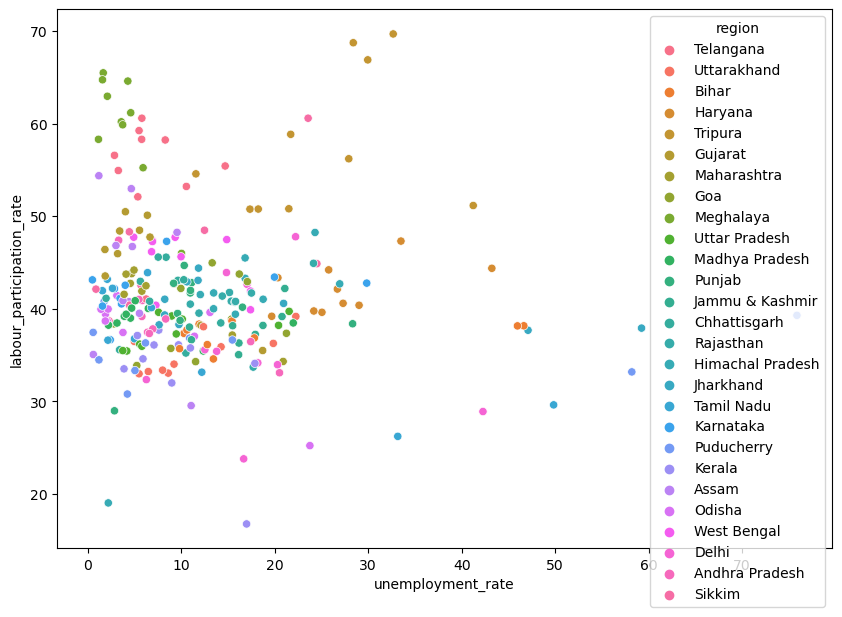

In [61]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data, x="unemployment_rate", y="labour_participation_rate", hue="region")
plt.show()